# WEEK6

## EX1

### Q1 a) Preprocessing:  a. Find any null values are present or not, If present remove those data. 

In [2]:
import pandas as pd
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [4]:
df=df.drop(columns=['Unnamed: 0','Title'])
df.dtypes

Clothing ID                 int64
Age                         int64
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
df.isna().sum()

Clothing ID                  0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [6]:
df=df.dropna()
df.isna().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### b)Remove the data that have less than 5 reviews.

In [7]:
df=df[df['Positive Feedback Count'] >= 5]
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
10,1077,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
21,1080,55,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses
22,1077,31,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses
31,1060,46,I never would have given these pants a second ...,5,1,7,General Petite,Bottoms,Pants
...,...,...,...,...,...,...,...,...,...
23448,1104,39,I like the contrast of the skirt with the bodi...,5,1,7,General Petite,Dresses,Dresses
23449,262,39,I tried these on because the color is really p...,3,0,7,General Petite,Intimate,Lounge
23467,1104,60,"I worry when i have an elastic waist, or somet...",5,1,23,General Petite,Dresses,Dresses
23477,1094,39,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses


### c)Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations. 

In [8]:
import contractions
import string

def clean_text(text):
    text = contractions.fix(text)
    text = text.lower()
    text = ''.join(char for char in text if char not in string.punctuation)
    return text
df['cleaned_review']=df['Review Text'].apply(clean_text)
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,cleaned_review
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...
10,1077,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,dress runs small esp where the zipper area run...
21,1080,55,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses,i am upset because for the price of the dress ...
22,1077,31,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,first of all this is not pullover styling ther...
31,1060,46,I never would have given these pants a second ...,5,1,7,General Petite,Bottoms,Pants,i never would have given these pants a second ...
...,...,...,...,...,...,...,...,...,...,...
23448,1104,39,I like the contrast of the skirt with the bodi...,5,1,7,General Petite,Dresses,Dresses,i like the contrast of the skirt with the bodi...
23449,262,39,I tried these on because the color is really p...,3,0,7,General Petite,Intimate,Lounge,i tried these on because the color is really p...
23467,1104,60,"I worry when i have an elastic waist, or somet...",5,1,23,General Petite,Dresses,Dresses,i worry when i have an elastic waist or someth...
23477,1094,39,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses,i am so impressed with the beautiful color com...


### Q2Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20). 

In [9]:
from sklearn.model_selection import train_test_split
X = df[['cleaned_review','Age','Clothing ID','Division Name','Department Name','Class Name']]
y = df['Recommended IND']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Q3 Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended  

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


vectorizer=CountVectorizer(stop_words='english')
X_train_reviews=vectorizer.fit_transform(X_train['cleaned_review'])
X_test_reviews=vectorizer.transform(X_test['cleaned_review'])

nb_model = MultinomialNB()

nb_model.fit(X_train_reviews,y_train)

y_pred = nb_model.predict(X_test_reviews)



### Q4 Tabulate accuracy in terms of precision, recall and F1 score.


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.47      0.58       179
           1       0.85      0.95      0.90       565

    accuracy                           0.83       744
   macro avg       0.80      0.71      0.74       744
weighted avg       0.82      0.83      0.82       744



## EX2

### Q1
Data Preprocessing and Feature Engineering 

• Load the dataset and explore its structure. 

• Identify and handle missing values appropriately. 

• Perform feature selection by calculating correlation coefficients and removing 
highly correlated features. 

• Convert continuous variables into categorical bins where appropriate (e.g., 
discretizing age-based rates). 

• Apply dimensionality reduction techniques such as PCA to optimize feature 
space.

• Create a binary target variable based on whether the 'Total.Rate' is above or below 
the third quartile, making classification more challenging.



### Q2. Split the dataset into training and testing sets with an 80-20 ratio.


### Q3.  Implementing Naïve Bayes  

• Select the following features for classification: 
o Rates.Age.< 18 
o Rates.Age.18-45 
o Rates.Age.45-64 
o Rates.Age.> 64 
o Types.Lung.Race.White 
o Types.Lung.Race.Black 
o Types.Lung.Race.Hispanic 

• Train multiple Naïve Bayes models (GaussianNB, MultinomialNB, and 
BernoulliNB) using only the selected features. 

• Compare the models based on precision, recall, F1-score, and AUC-ROC curve. 

• Analyze the assumptions of each Naïve Bayes variant and determine which one 
fits the dataset best.

In [13]:
df2=pd.read_csv("cancer.csv")
df2.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,102.9,221.7,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,50.3,268.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,47.0,191.9,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,106.5,248.7,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,36.8,192.5,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3


In [14]:
print(df2.isnull().sum())
df2.fillna(df.median(), inplace=True)

State                                 0
Total.Rate                            0
Total.Number                          0
Total.Population                      0
Rates.Age.< 18                        0
                                     ..
Types.Lung.Race.Black                 0
Types.Lung.Race.Black non-Hispanic    0
Types.Lung.Race.Asian                 0
Types.Lung.Race.Indigenous            0
Types.Lung.Race.Hispanic              0
Length: 75, dtype: int64


C:\Users\mca\AppData\Local\Temp\ipykernel_16948\1733578724.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.fillna(df.median(), inplace=True)


In [16]:
corr_matrix = df2.corr()
print(corr_matrix)

                                    Total.Rate  Total.Number  \
Total.Rate                            1.000000     -0.024490   
Total.Number                         -0.024490      1.000000   
Total.Population                     -0.157594      0.977333   
Rates.Age.< 18                        0.187891      0.266961   
Rates.Age.18-45                       0.662638      0.174017   
...                                        ...           ...   
Types.Lung.Race.Black                 0.197895      0.284380   
Types.Lung.Race.Black non-Hispanic    0.159734      0.299867   
Types.Lung.Race.Asian                -0.129281      0.285917   
Types.Lung.Race.Indigenous           -0.100606     -0.140642   
Types.Lung.Race.Hispanic             -0.223033      0.249380   

                                    Total.Population  Rates.Age.< 18  \
Total.Rate                                 -0.157594        0.187891   
Total.Number                                0.977333        0.266961   
Total.Populatio

In [17]:
corr_matrix = corr_matrix.fillna(0)

In [18]:
correlation_threshold = 0.9

columns_to_drop = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > correlation_threshold:  
            colname = corr_matrix.columns[i]  
            columns_to_drop.add(colname)  

dfr = df2.drop(columns=columns_to_drop)
dfr

,State,Total.Rate,Total.Number,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,Rates.Race.White,...,Types.Colorectal.Age and Sex.Male.> 64,Types.Colorectal.Race.White,Types.Colorectal.Race.Asian,Types.Colorectal.Race.Indigenous,Types.Colorectal.Race.Hispanic,Types.Lung.Age and Sex.Female.18 - 44,Types.Lung.Age and Sex.Male.18 - 44,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,2.0,18.5,244.7,1017.8,2.0,2.1,186.1,...,106.0,15.9,0.0,0.0,5.7,1.7,2.4,23.0,22.9,14.8
1,Alaska,128.1,6361.0,1.7,11.8,170.9,965.2,0.0,0.0,168.2,...,102.3,13.6,12.5,34.7,0.0,0.0,0.0,33.0,74.4,0.0
2,Arizona,165.6,74286.0,2.5,13.6,173.6,840.2,2.6,2.5,153.5,...,85.2,13.8,10.6,10.1,13.1,1.1,0.8,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,2.3,17.6,250.1,1048.3,2.6,2.0,192.2,...,114.4,17.7,0.0,0.0,8.1,1.9,1.8,18.1,16.2,14.6
4,California,150.9,393980.0,2.6,13.7,163.7,902.4,2.4,2.8,160.7,...,93.3,14.4,11.6,7.7,11.7,0.8,0.8,25.8,18.4,18.3
5,Colorado,139.0,49035.0,1.9,11.7,149.6,849.4,1.9,1.9,148.0,...,83.3,13.4,10.7,7.6,14.8,0.7,0.7,22.8,22.3,25.6
6,Connecticut,190.5,47567.0,1.6,13.6,163.6,971.2,1.6,1.7,160.1,...,85.3,12.8,6.6,0.0,10.2,1.5,1.3,20.8,0.0,20.3
7,Delaware,210.2,13233.0,2.2,16.0,217.5,993.3,0.0,0.0,181.8,...,93.8,15.4,0.0,0.0,0.0,0.0,2.1,23.7,0.0,15.5
8,District of Columbia,182.1,7730.0,0.0,12.4,251.8,1028.6,0.0,0.0,127.8,...,102.1,10.0,0.0,0.0,9.1,0.0,0.0,0.0,0.0,18.8
9,Florida,219.2,289905.0,2.1,15.9,206.9,901.2,2.0,2.2,164.2,...,91.6,14.3,9.2,5.6,13.4,1.6,1.5,19.8,21.0,24.0


In [19]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 100]  

dfr['Age.< 18 Binned'] = pd.cut(dfr['Rates.Age.< 18'], bins=age_bins, include_lowest=True)
dfr['Age.18-45 Binned'] = pd.cut(dfr['Rates.Age.18-45'], bins=age_bins, include_lowest=True)
dfr['Age.45-64 Binned'] = pd.cut(dfr['Rates.Age.45-64'], bins=age_bins, include_lowest=True)
dfr['Age.> 64 Binned'] = pd.cut(dfr['Rates.Age.> 64'], bins=age_bins, include_lowest=True)

In [20]:
third_quartile = dfr['Total.Rate'].quantile(0.75)

dfr['Target'] = (dfr['Total.Rate'] > third_quartile).astype(int)

print(dfr[['Total.Rate', 'Target']].head())

   Total.Rate  Target
0       214.2       1
1       128.1       0
2       165.6       0
3       223.9       1
4       150.9       0


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dfr = dfr.drop(columns=['State'])

X = dfr.drop(columns=['Total.Rate', 'Target'])

X = pd.get_dummies(X, drop_first=True) 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [28]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

features = ['Rates.Age.< 18', 'Rates.Age.18-45', 'Rates.Age.45-64', 'Rates.Age.> 64',
            'Types.Lung.Race.Hispanic']

X = dfr[features]
y = dfr['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

results_df = pd.DataFrame(results).T
print(results_df)

             Accuracy  Precision  Recall  F1 Score
GaussianNB   0.909091       0.75     1.0  0.857143
BernoulliNB  0.909091       0.75     1.0  0.857143


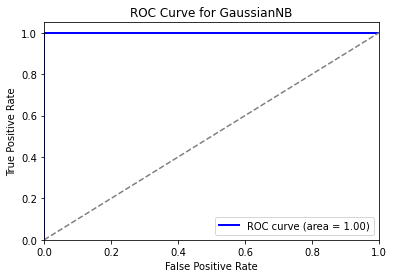

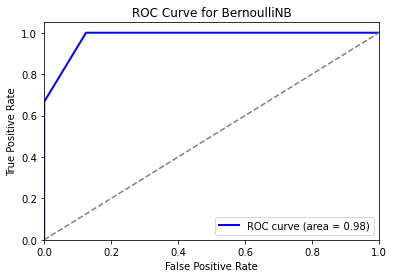

The best model based on AUC-ROC is GaussianNB with AUC: 1.00


In [29]:
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

roc_results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    y_prob = model.predict_proba(X_test_scaled)[:, 1]  

    fpr, tpr,_ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    roc_results[model_name] = roc_auc

    plot_roc_curve(fpr, tpr, roc_auc, model_name)

best_model = max(roc_results, key=roc_results.get)
print(f"The best model based on AUC-ROC is {best_model} with AUC: {roc_results[best_model]:.2f}")